In [219]:
import pandas as pd
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt
import BRKGA as brkga

In [220]:
dem = pd.read_csv("Instances/AnalisePopulacionalTratada.csv",index_col=0)
dem = dem.reindex(index = sorted(dem.index))

In [221]:
prox = pd.read_csv("Instances/Proximidade.csv",dtype=int, index_col=0)
prox.columns = prox.columns.to_numpy(int)
prox = prox.reindex(index = sorted(prox.index), columns=sorted(prox.columns))

In [248]:
_relation = pd.read_csv("Instances/hospitalCidades.csv",index_col=0,header=None,squeeze=True)

In [249]:
params=pd.DataFrame([len(_relation),8,20,4,2,10,False],["N","M","P","Elite","Mutant","K","Type"],["Value"])

In [250]:
facilities_cost = np.random.random(params.loc["N"]["Value"])*100000
facilities_cover = np.random.random(params.loc["N"]["Value"])*1000

In [251]:
for i in range(0,params.loc["N"]["Value"]):
    facilities_cover[i]= facilities_cover[i]/dem["Urban Density (People/Km2)"][i]*_relation.value_counts()[_relation[i]]

In [252]:
Heuristic = brkga.BRKGA(facilities_cover,facilities_cost,
                        params.loc["M"]["Value"],params.loc["P"]["Value"],
                        params.loc["Elite"]["Value"],params.loc["Mutant"]["Value"],
                        params.loc["K"]["Value"],params.loc["Type"]["Value"])

In [253]:
solutions, facilities = Heuristic.Solve()

In [254]:
best_solutions = Heuristic.getObjectiveEvolution()

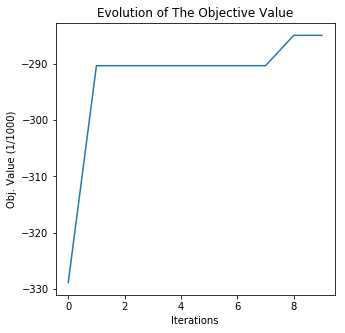

In [255]:
Fig = plt.figure(figsize=(5,5),)
plt.plot(range(0,params.loc["K"]["Value"]),pd.Series(best_solutions)/1000,figure=Fig)
plt.xlabel("Iterations")
plt.ylabel("Obj. Value (1/1000)")
plt.title("Evolution of The Objective Value")
Fig.savefig("Exit/Evolution.png")

In [256]:
exit_data = pd.DataFrame(facilities)
exit_data["sol_value"] = solutions
exit_data.to_csv("Exit/Solutions.csv")